# ANN: Artificial Neural Networks (Redes Neuronales Artificiales)
## Itroduccion:

* Lo que deja bases (matematicas) firmes en ANN  es el de aproximadores universales. Es decir casi cuaquier funcion matematica de $\mathbb{R}^n \to \mathbb{R}^m$ se puede representar, con la precision deseada, por una ANN, escogiendo
el numero adecuado de capas y nodos. La primera prueba de este teorema fue por Cybenko, 1989 usando las sigmoid logistic activation functions. Nielsen, 2015 tiene una explicacion  heuristica muy buena de este hecho. Ver
[Nielsen](http://neuralnetworksanddeeplearning.com/).

* Del curso de ML: recatamos:
    * Perceptron (todos con todos)
    * MLP: Multi-layer perceptron
    * Funciones de activacion
    * Propagacion hacia adelante
    * Propagacion hacia atras con activacion sigmoid logistics y con un softmax cost function.

En esta version estudiamos "backpropagation" no solo mas general sino mas simplificada.

Veamos como derivamos este algoritmo.

Asumamos la funcion de costo


$$C(X,Y,\theta) = \frac{1}{m} \sum_{i=1}^m C_i(\Theta) \tag{1} .$$

En adelante escribimos $C(\Theta)$ en vez de $C(X,Y,\Theta)$ para evitar escribir mucho y por que $X,Y$ son parametros fijos en el estudio del gradiente.

El algoritmo de aca esta basado en Nielsen.

De la ecuacion (1) nos interesa un termino generico ( por que la derivada es lineal, la derivada de la suma, es la suma de las derivadas)

Queremos calcular


$$\frac{\partial C_i(\Theta)}{\partial \theta_{kj}^\ell} .$$
Ahora tambien vamos a eliminar el indice $i$ por que no es relevante par el trabajo que tenemos y es un complicacion innecesaria.

$$\frac{\partial C(\Theta)}{\partial \theta_{kj}^\ell} .$$

Se usa la regla de la cadena. Recuerde que cada capa tiene los $z_i$. (son funcion lineal de los $\theta$

Tenemos, usando la activacion $a=f(x)$.

$$\frac{\partial C}{\partial \theta_{kj}^\ell} = \frac{\partial C}{\partial z_j^{\ell}} \frac{\partial z_j^{\ell}}{\partial \theta_{kj}^\ell} \quad , \quad j, \ell \text{  fixed}  $$


Veamos que relacion tienen los $z_j^\ell$ con $\theta_{kj}^{\ell}$
\ell
$$z_j^{\ell} = \sum_p a_p^{\ell -1} \theta_{pj}^{\ell} $$
basados en esto

$$\frac{\partial z_j^\ell }{\partial \theta_{kj}^{\ell}}
= \sum_p a_p^{\ell -1} \frac{\partial \theta_{pj}^\ell}{\partial \theta_{kj}^\ell} = \sum_p \delta_{pk} a_p^{\ell -1} = a_k^{\ell -1} .$$

$$ \frac{\partial C}{\partial \theta_{kj}^\ell} = \frac{\partial C}{\partial z_j^\ell} a_k^{\ell-1} = a_k^{\ell -1} d_j^\ell .$$

$$ d_j^\ell = \frac{\partial C}{\partial z_j^\ell} $$

Empezamos de atras hacia adelante con $\ell=L$, donde $L$ es la ultima capa.

Vamos a usar la regla de la cadena en
$$C(\theta)=  C(a^L(z^L)) $$
Estamos buscando, como $a_j^L= f(z_j^L) $


$$  d_j^L = \frac{\partial C}{\partial a_j^L} f'(z_j^L) \quad  , \quad j \text{   fijo  } \tag{2}.$$


El calculo de $f'(z_j^L)$ es facil.
La ecuacion (2) la podemos escribir de forma vectorial

$$d^{(L)} = \nabla_{a^L} C \circ f'(Z^L) .$$

Pensamos que $z_j^{\ell +1} = g(z_1^\ell, z_2^\ell, \cdots, z_n^\ell)  $
donde $n$ es el numero de nodos en la capa $\ell$.
De aca sale la recursividad que necesitamos.
Calculemos ahora $d_j^\ell$, $\ell=L-1, L-2, \cdots, 1$

\begin{eqnarray}
d_j^\ell &=& \frac{\partial C}{\partial z_j^{\ell}} \\
&=& \sum_k \frac{\partial C}{\partial z_k^{\ell +1}} \frac{\partial z_k^{\ell +1}}{\partial z_j^\ell} \\
&=& \sum_k d_k^{\ell + 1} \frac{\partial z_k^{\ell+1}}{\partial z_j^{\ell}}  \tag{3}
\end{eqnarray}

Cual es la relacion **explicita** entre $z_k^{\ell +1}$ y $z_j^\ell$. (esta viene de la propagacion hacia adelante)


$$z_k^{\ell +1} = \sum_p a_p^{\ell} \theta_{pk}^{\ell+1} = \sum_p \theta_{pk}^{\ell +1} f(z_p^\ell) .$$

Calculamos la "colita" de la expresion.

$$\frac{\partial z_k^{\ell +1}}{\partial z_j^{\ell}}= \sum_p \theta_{pk}^{\ell +1} f'(z_p^\ell) \delta_{pj} = \theta_{jk}^{\ell +1} f'(z_j^\ell) $$
Podemos insertar esto en la ecuacion (3) y encontramos (la recursividad que estabamos buscando)

$$d_j^\ell = \sum_k d_k^{\ell +1} \theta_{jk}^{\ell +1} f'(z_j^\ell ).$$

Esto tambien lo podemos **vectorizar**

$$d^\ell =  \Theta^{\ell +1} d^{\ell+1} \circ f'(z^\ell) $$
Con todo esto podemos propagar hacia atras para $L-1, L-2, \cdots,1 $

El algoritmo se muestra en la siguiente figura.









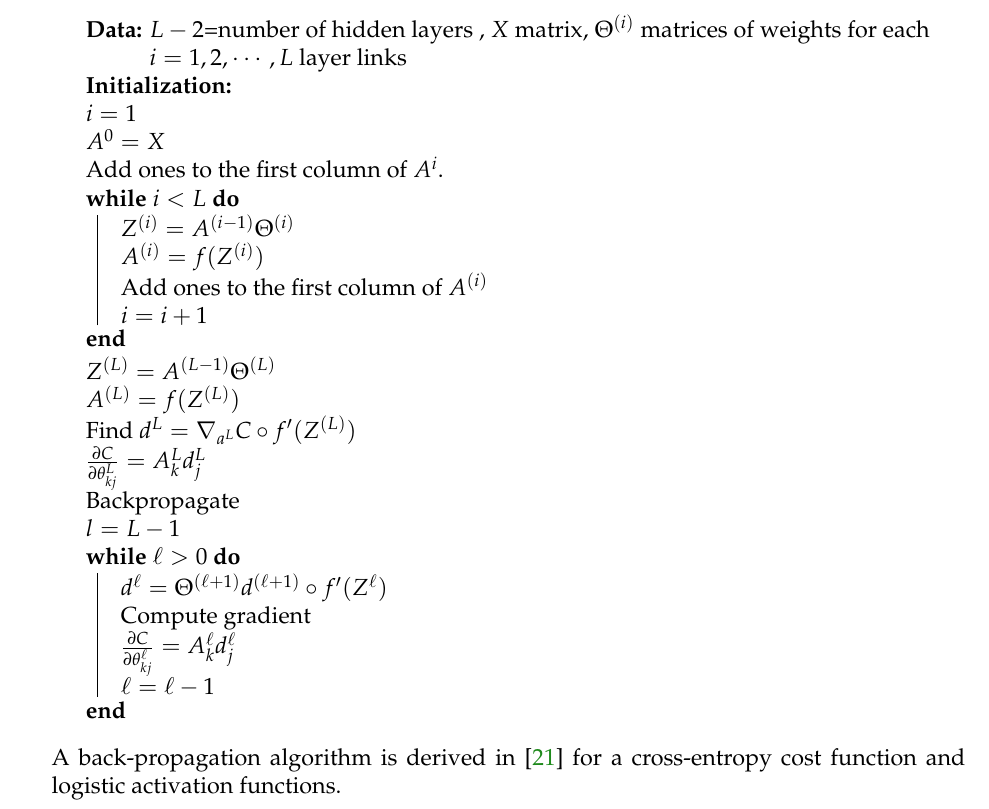

# Desarrollo de un modelo
* conseguir los datos (data acquisition)
* pre-procesar los datos
* construir la arquitectura
* entrenar y probar el modelo
* hacer predicciones

Estos pasos podrian estar en un ciclo.

## Consecucion de datos.
Los siguientes son enlaces de bases de datos importantes para el desarrollo de modelos en ML

* [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
* [paperswithcode.com](https://paperswithcode.com/datasets)
* [Imagenet](https://image-net.org/) (Fei-Fei Li)
* [Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html)
* [MNIST Database](https://yann.lecun.com/exdb/mnist/)
* [CIFAR-10, CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) imagenes pequenhas de 10 y 100 clases. Como comentario
[Stanford CNN](https://cs231n.stanford.edu/) usa el CIFAR 10 para el demo en vivo. Tiene mas de 80 millones de imagenes pequenhas.
* [Princeton ModelNet project](https://modelnet.cs.princeton.edu/) Es un conjunto amplio, limpios para 3D Computer Aided Design CAD.
* [unshap.com](https://unsplash.com/)

Obvio que hay muchos mas. De hecho, por ejemplo para NLP (Natural Language Processing) todo Wikipedia sirve, el mismo YouTube es una fuente grande videos, ....."ilimitado"

## Preprocesamiento de datos:
    Algunos pasos importantes

    * Homogenizacion de los datos. Imagnes pueden tener distintas escalas y pixeles y se pueden recortar para que todas tengan las mimsma dimensiones.
    * Normalizacion. Alguna normalizacion se puede hacer.
    * Remover NaN, NONE (Not a number)
    * Formatear, puede usar PANDAS, obtener datos en distintos formatos, CSV (Comma separated value) o otros
    * etc.


## construccion de arquitectura
La arquitectura consiste en

* numero de capas
* numero de nodos por capa
* funciones de activacion
* funcion de costo
* tecnica de gradiente
* metricas de error

Entre otras, ademas podemos pensar en la forma como se conectan

* Densas (todos-con-todos), MLP
* Convolucionales (CNN)
* RNN
* GANS: Hay dos redes corriendo simulaneamente.


En la proxima tarea les dejo que miren el

[Playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.16600&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

Ojo, los hiperparametros son muchos. Los parametros son $\Theta$ lo demas son hiperparametros: Todo lo que conforma la red....
## Entrenamiento
Se deben usar por lo menos 3 conjuntos de entramiento, validacion y prueba....

## Hacer predicciones.
En la predicciones podria pasar que son malas, (para esto estan las metricas) y podrimos tener que volver al principio.




